In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score, train_test_split, GridSearchCV, StratifiedShuffleSplit

np.random.seed(306)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [7]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (16512, 8)
Shape of test data (4128, 8)
Shape of training labels (16512,)
Shape of test labels (4128,)


In [9]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(hidden_layer_sizes=(32)))
])

cv_results = cross_validate(
    pipe, X_train, y_train, cv = cv,
    scoring = "neg_mean_absolute_percentage_error",
    return_train_score=True, return_estimator=True, n_jobs=2
)

mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
        f"{mlp_train_error.mean():.3f} +/- {mlp_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n"
        f"{mlp_test_error.mean():.3f} +/- {mlp_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.213 +/- 0.005
Mean absolute error of linear regression model on the test set:
0.213 +/- 0.008


error in train and test is very similar which indicates well trained

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [11]:
mean_absolute_percentage_error(y_train, pipe.predict(X_train))

0.20517616916407155

In [12]:
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

0.21680164186883305

Text(0, 0.5, 'predicted')

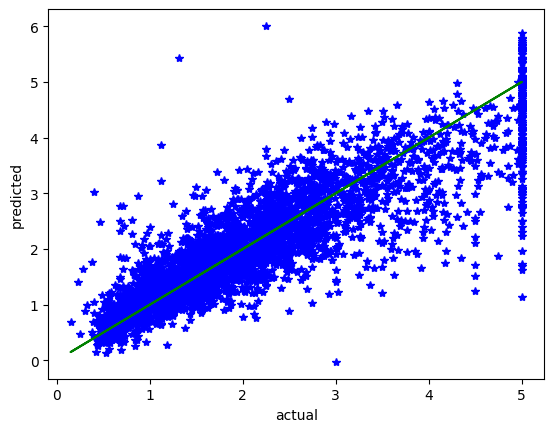

In [15]:
plt.plot(y_test, pipe.predict(X_test), 'b*')
plt.plot(y_test, y_test, 'g-')
plt.xlabel('actual')
plt.ylabel('predicted')

all the values >5 are truncated to 5 that's why for that point the regressor doesn't do that well